# <font color = 'Green'>Python_Programming_ML_Models</font>

## <font color = 'Blue'>Question 1:</font>

**1. Generate 100 data points satisfying y = 2.1x + 3.4 + random_noise.**

In [1]:
#Import libraries
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

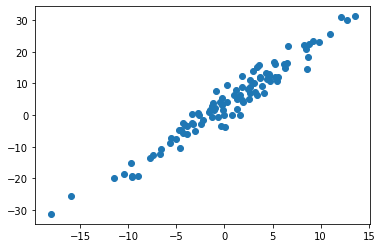

In [2]:
#Generate 100 normally distributed random values
x = np.random.normal(0,6,100)
noise = np.random.normal(0,2.9,x.shape)

#Generating dependent varibles
yEq = (2.1 * x) + 3.4 + noise

#Scatter plot of all independent and dependent variables
plt.scatter(x, yEq)

In [3]:
#Dataframing the values
df = pd.DataFrame()
df['XVal'] = x
df['yVal'] = yEq

#Data shape
df.shape

(100, 2)

In [4]:
#Import sklearn library
from sklearn.model_selection import train_test_split

#Creating varibles for data split
X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

#Split data values into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(80, 1) (20, 1) (80,) (20,)


In [5]:
#Print Dataframe
df

,XVal,yVal
0,-3.921716,-5.829137
1,1.038721,6.378536
2,4.272907,13.316325
3,0.226142,4.025872
4,-6.618120,-10.645548
...,...,...
95,-1.263480,-0.503911
96,-4.687275,-4.760670
97,5.244368,11.940021
98,-0.718229,-0.517701


**2. Use the builtin sklearn's LinearRegression() model to estimate the linear regression model from the data.**

In [6]:
#Import Linear Regression from sklearn
from sklearn.linear_model import LinearRegression

#Run linear regression function and print intercept and coefficient
regressor = LinearRegression()
regressor.fit(X_train, y_train)

print('Intercept: ', regressor.intercept_)
print('Coefficient: ', regressor.coef_)

Intercept:  3.262164522417905
Coefficient:  [2.04954114]


In [7]:
#Predicitng y values on the test set and comparing to the actuals
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,22.482170,21.274493
1,14.580381,20.888585
2,13.316325,12.019663
3,12.994417,12.777924
4,1.747765,2.845118
5,12.037988,10.849412
6,3.327528,2.701863
7,-15.080864,-16.743335
8,0.865156,-0.126472
9,-0.503911,0.672611


Mean Squared Error on Test:  7.392198584873517


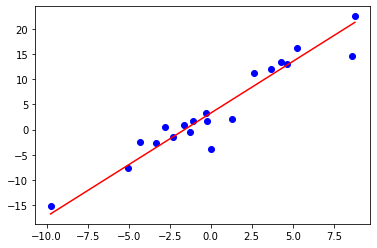

In [8]:
#Import MSE from sklearn
from sklearn.metrics import mean_squared_error

#Run the mean square error on the test values
mse = mean_squared_error(y_test,y_pred)
print("Mean Squared Error on Test: ", mse)

#Show the fitted plot
order = X_test[:,0].argsort()
xs = X_test[order]
ys = y_pred[order]
plt.plot(xs,ys,"r-")
plt.scatter(X_test, y_test, color='blue')
plt.show()

**3. Use gradient descent to estimate the model from the data.**

In [9]:
#Defining gradient descent function
def gradientDescent(X, y, L, m, c, epochs, n):
    
    mse_val = []
    m_val = []
    c_val = []

    #Performing Gradient Descent 
    for i in range(epochs): 
        #The current predicted value of Y
        Y_pred = m * X_train + c
        mse_val.append(sum((y - Y_pred) ** 2)/n)
        m_val.append(m)
        c_val.append(c)
        #Derivative wrt m
        D_m = (-2/n) * sum(X * (y - Y_pred))
        #Derivative wrt c
        D_c = (-2/n) * sum(X - Y_pred)
        #Update m
        m = m - L * D_m
        #Update c
        c = c - L * D_c 
        print("m {},c {},iterations {}".format(m,c,i))
    return mse_val, m_val, c_val

In [10]:
m = 0
c = 0

#Set the learning Rate
L = 0.1

#The number of iterations to perform gradient descent
epochs = 1000
n = len(X_train)

#Call the radient descent function
mseVal, mVal ,cVal = gradientDescent(X_train, y_train, L, m, c, epochs, n)

m [ 1.18429678e-02  7.19805961e-01  3.58209081e-01 -1.21052543e+00
  3.40233745e-03 -1.70924707e+00  3.62733630e-01  8.43303970e-01
  4.45991322e-01  2.04685781e+00  1.92852750e-01  1.43441223e+00
  2.29035338e+00  5.58944488e-01  6.22394256e-01 -4.91589123e-01
 -4.13382743e-01 -1.08182153e+00 -2.63827687e-03  4.30930512e-01
  5.67541612e-01 -4.51281988e-01  1.03262446e+00 -9.25110129e-01
 -9.47206590e-01  1.23785357e+00  1.00846826e+00  6.37956823e-01
 -3.18188410e-01 -1.13069853e+00  6.87088419e-01  3.62939379e-01
 -5.18657842e-01  1.06368811e+00  1.80224162e-02  1.10410095e+00
 -2.98900468e-01  1.55628678e-01  7.81740834e-01  2.08203439e+00
 -2.64813951e-01  3.27745552e-01  1.10087135e+00  8.91811424e-01
  1.47877642e+00 -2.39983347e-01  2.67915066e+00  1.98612435e+00
 -1.76378893e+00 -6.53927480e-01 -2.27269440e+00  1.50321112e+00
  1.33579506e+00  1.06238461e+00 -4.60634112e-02  1.87453457e+00
  1.34981468e+00 -2.78203922e+00  4.67520480e-01 -2.44639196e-01
  2.75079859e+00 -7.760

  7.33791619e+13 -1.07874438e+13 -7.02984904e+13 -8.32132507e+13],iterations 19
m [ 3.04739395e+14  1.70186357e+16  8.48190029e+15 -2.85534619e+16
  1.05469346e+14 -4.03274980e+16  8.58871779e+15  1.99342301e+16
  1.05543014e+16  4.83482492e+16  4.57809657e+15  3.38893694e+16
  5.40967978e+16  1.32209485e+16  1.47188981e+16 -1.15805030e+16
 -9.73417294e+15 -2.55149646e+16 -3.71400871e+13  1.01987393e+16
  1.34239131e+16 -1.06289147e+16  2.44037901e+16 -2.18152542e+16
 -2.23369170e+16  2.92489275e+16  2.38335000e+16  1.50863059e+16
 -7.48678400e+15 -2.66688740e+16  1.62462258e+16  8.59357520e+15
 -1.22195530e+16  2.51371541e+16  4.50626483e+14  2.60912378e+16
 -7.03142593e+15  3.69929457e+15  1.84808209e+16  4.91787131e+16
 -6.22669670e+15  7.76270412e+15  2.60149920e+16  2.10794150e+16
  3.49367383e+16 -5.64048508e+15  6.32756921e+16  4.69144275e+16
 -4.16151457e+16 -1.54130570e+16 -5.36296060e+16  3.55136033e+16
  3.15611725e+16  2.51063804e+16 -1.06233943e+15  4.42799678e+16
  3.1892

  2.47022891e+94 -3.63147450e+93 -2.36652149e+94 -2.80128272e+94],iterations 117
m [ 1.02587171e+95  5.72913683e+96  2.85533860e+96 -9.61220942e+96
  3.55050973e+94 -1.35758094e+97  2.89129754e+96  6.71063967e+96
  3.55298966e+96  1.62759072e+97  1.54116594e+96  1.14084841e+97
  1.82110930e+97  4.45068715e+96  4.95495541e+96 -3.89844917e+96
 -3.27690244e+96 -8.58933268e+96 -1.25028025e+94  3.43329359e+96
  4.51901296e+96 -3.57810742e+96  8.21526798e+96 -7.34386580e+96
 -7.51947785e+96  9.84633029e+96  8.02328607e+96  5.07863922e+96
 -2.52034363e+96 -8.97778358e+96  5.46911353e+96  2.89293273e+96
 -4.11357834e+96  8.46214691e+96  1.51698457e+95  8.78332872e+96
 -2.36705233e+96  1.24532690e+96  6.22136544e+96  1.65554738e+97
 -2.09614907e+96  2.61322911e+96  8.75766141e+96  7.09615360e+96
  1.17610693e+97 -1.89880737e+96  2.13010670e+97  1.57932269e+97
 -1.40092819e+97 -5.18863641e+96 -1.80538180e+97  1.19552646e+97
  1.06247222e+97  8.45178728e+96 -3.57624903e+95  1.49063650e+97
  1.073

m [ 8.73630149e+099  4.87892063e+101  2.43160022e+101 -8.18573691e+101
  3.02360647e+099 -1.15611301e+102  2.46222278e+101  5.71476634e+101
  3.02571837e+101  1.38605277e+102  1.31245361e+101  9.71544057e+101
  1.55085277e+102  3.79019562e+101  4.21962940e+101 -3.31991094e+101
 -2.79060308e+101 -7.31465728e+101 -1.06473598e+099  2.92378545e+101
  3.84838174e+101 -3.04710860e+101  6.99610458e+101 -6.25402035e+101
 -6.40357120e+101  8.38511375e+101  6.83261320e+101  4.32495826e+101
 -2.14631922e+101 -7.64546123e+101  4.65748535e+101  2.46361530e+101
 -3.50311448e+101  7.20634615e+101  1.29186081e+100  7.47986389e+101
 -2.01577669e+101  1.06051771e+101  5.29810146e+101  1.40986059e+102
 -1.78507605e+101  2.22542030e+101  7.45800567e+101  6.04306918e+101
  1.00157014e+102 -1.61702028e+101  1.81399429e+102  1.34494781e+102
 -1.19302744e+102 -4.41863163e+101 -1.53745927e+102  1.01810777e+102
  9.04799060e+101  7.19752391e+101 -3.04552600e+100  1.26942284e+102
  9.14287664e+101 -1.88218845e+1

  1.29919827e+114 -1.90994664e+113 -1.24465413e+114 -1.47331352e+114],iterations 141
m [ 5.39549492e+114  3.01319632e+116  1.50174381e+116 -5.05546907e+116
  1.86736382e+114 -7.14009459e+116  1.52065614e+116  3.52941034e+116
  1.86866812e+116  8.56019069e+116  8.10564606e+115  6.00020619e+116
  9.57798705e+116  2.34080535e+116  2.60602144e+116 -2.05035995e+116
 -1.72346213e+116 -4.51749476e+116 -6.57575471e+113  1.80571487e+116
  2.37674079e+116 -1.88187862e+116  4.32075825e+116 -3.86245084e+116
 -3.95481268e+116  5.17860318e+116  4.21978681e+116  2.67107201e+116
 -1.32555573e+116 -4.72179758e+116  2.87643902e+116  1.52151616e+116
 -2.16350551e+116  4.45060237e+116  7.97846598e+114  4.61952551e+116
 -1.24493333e+116  6.54970292e+115  3.27208025e+116  8.70722660e+116
 -1.10245380e+116  1.37440815e+116  4.60602599e+116  3.73216848e+116
  6.18564574e+116 -9.98663419e+115  1.12031356e+117  8.30632860e+116
 -7.36807616e+116 -2.72892420e+116 -9.49526945e+116  6.28778128e+116
  5.58799252e+11

m [ 2.13285427e+190  1.19112495e+192  5.93643538e+191 -1.99844110e+192
  7.38174155e+189 -2.82249941e+192  6.01119636e+191  1.39518580e+192
  7.38689749e+191  3.38386738e+192  3.20418462e+191  2.37189833e+192
  3.78620514e+192  9.25326918e+191  1.03016758e+192 -8.10513036e+191
 -6.81289412e+191 -1.78577835e+192 -2.59941428e+189  7.13804154e+191
  9.39532300e+191 -7.43911896e+191  1.70800785e+192 -1.52683765e+192
 -1.56334854e+192  2.04711636e+192  1.66809356e+192  1.05588225e+192
 -5.23995896e+191 -1.86653983e+192  1.13706441e+192  6.01459603e+191
 -8.55239795e+191  1.75933560e+192  3.15390998e+190  1.82611139e+192
 -4.92125635e+191  2.58911593e+191  1.29346250e+192  3.44199109e+192
 -4.35803078e+191  5.43307394e+191  1.82077499e+192  1.47533667e+192
  2.44520311e+192 -3.94774450e+191  4.42863090e+192  3.28351499e+192
 -2.91262117e+192 -1.07875139e+192 -3.75350664e+192  2.48557757e+192
  2.20894911e+192  1.75718176e+192 -7.43525523e+190  3.09913060e+192
  2.23211430e+192 -4.59511807e+1

m [-2.33197849e+199 -1.30232891e+201 -6.49066361e+200  2.18501644e+201
 -8.07090421e+198  3.08600921e+201 -6.57240431e+200 -1.52544097e+201
 -8.07654151e+200 -3.69978674e+201 -3.50332871e+200 -2.59333981e+201
 -4.13968692e+201 -1.01171585e+201 -1.12634448e+201  8.86182891e+200
  7.44894893e+200  1.95249940e+201  2.84209674e+198 -7.80445225e+200
 -1.02724745e+201  8.13363839e+200 -1.86746822e+201  1.66938389e+201
  1.70930345e+201 -2.23823605e+201 -1.82382751e+201 -1.15445989e+201
  5.72916384e+200  2.04080081e+201 -1.24322125e+201 -6.57612138e+200
  9.35085360e+200 -1.92358794e+201 -3.44836041e+199 -1.99659796e+201
  5.38070702e+200 -2.83083694e+200 -1.41422073e+201 -3.76333690e+201
  4.76489846e+200 -5.94030812e+200 -1.99076335e+201 -1.61307475e+201
 -2.67348835e+201  4.31630767e+200 -4.84208984e+201 -3.59006540e+201
  3.18454477e+201  1.17946409e+201  4.10393568e+201 -2.71763219e+201
 -2.41517758e+201 -1.92123302e+201  8.12941395e+199 -3.38846680e+201
 -2.44050548e+201  5.02412032e+2

<ipython-input-9-3a23114d28a5>:12: RuntimeWarning: overflow encountered in add
  mse_val.append(sum((y - Y_pred) ** 2)/n)
<ipython-input-9-3a23114d28a5>:12: RuntimeWarning: overflow encountered in square
  mse_val.append(sum((y - Y_pred) ** 2)/n)


m [-7.44055235e+210 -4.15528979e+212 -2.07095059e+212  6.97164631e+212
 -2.57515176e+210  9.84640859e+212 -2.09703128e+212 -4.86716469e+212
 -2.57695044e+212 -1.18047645e+213 -1.11779336e+212 -8.27446766e+212
 -1.32083368e+213 -3.22804209e+212 -3.59378319e+212  2.82750901e+212
  2.37670693e+212  6.22976330e+212  9.06816666e+209 -2.49013598e+212
 -3.27759817e+212  2.59516811e+212 -5.95845764e+212  5.32643772e+212
  5.45380752e+212 -7.14145200e+212 -5.81921494e+212 -3.68348990e+212
  1.82798185e+212  6.51150314e+212 -3.96669730e+212 -2.09821727e+212
  2.98354020e+212 -6.13751664e+212 -1.10025484e+211 -6.37046683e+212
  1.71680109e+212 -9.03224045e+211 -4.51229863e+212 -1.20075315e+213
  1.52031747e+212 -1.89535082e+212 -6.35185057e+212 -5.14677437e+212
 -8.53019446e+212  1.37718737e+212 -1.54494662e+213 -1.14546809e+213
  1.01608021e+213  3.76326985e+212  1.30942667e+213 -8.67104249e+212
 -7.70601241e+212 -6.13000289e+212  2.59382024e+211 -1.08114482e+213
 -7.78682516e+212  1.60302638e+2

m [ 3.77627723e+290  2.10891954e+292  1.05106223e+292 -3.53829501e+292
  1.30695767e+290 -4.99731295e+292  1.06429887e+292  2.47021489e+292
  1.30787055e+292  5.99123040e+292  5.67309712e+291  4.19951132e+292
  6.70358048e+292  1.63831679e+292  1.82394008e+292 -1.43503565e+292
 -1.20624167e+292 -3.16176975e+292 -4.60233457e+289  1.26380991e+292
  1.66346781e+292 -1.31711650e+292  3.02407495e+292 -2.70330811e+292
 -2.76795165e+292  3.62447589e+292  2.95340559e+292  1.86946861e+292
 -9.27749166e+291 -3.30476017e+292  2.01320386e+292  1.06490079e+292
 -1.51422561e+292  3.11495213e+292  5.58408448e+290  3.23318051e+292
 -8.71321991e+291  4.58410107e+291  2.29011098e+292  6.09414003e+292
 -7.71601353e+291  9.61940704e+291  3.22373227e+292  2.61212420e+292
  4.32929944e+292 -6.98959036e+291  7.84101298e+292  5.81355372e+292
 -5.15687600e+292 -1.90995904e+292 -6.64568688e+292  4.40078355e+292
  3.91100524e+292  3.11113870e+292 -1.31643242e+291  5.48709609e+292
  3.95201985e+292 -8.13578310e+2

m [ 2.33220942e+305              nan              nan              nan
  8.07170345e+304              nan              nan              nan
              nan              nan              nan              nan
              nan              nan              nan              nan
              nan              nan -2.84237819e+304              nan
              nan              nan              nan              nan
              nan              nan              nan              nan
              nan              nan              nan              nan
              nan              nan  3.44870189e+305              nan
              nan              nan              nan              nan
              nan              nan              nan              nan
              nan              nan              nan              nan
              nan              nan              nan              nan
              nan              nan             -inf              nan
              nan              n

m [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan],c [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan],iterations 454
m [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan],c

<ipython-input-9-3a23114d28a5>:16: RuntimeWarning: overflow encountered in add
  D_m = (-2/n) * sum(X * (y - Y_pred))
<ipython-input-9-3a23114d28a5>:18: RuntimeWarning: invalid value encountered in add
  D_c = (-2/n) * sum(X - Y_pred)
<ipython-input-9-3a23114d28a5>:20: RuntimeWarning: invalid value encountered in subtract
  m = m - L * D_m


m [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan],c [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan],iterations 475
m [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan],c

m [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan],c [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan],iterations 560
m [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan],c

m [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan],c [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan],iterations 576
m [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan],c

m [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan],c [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan],iterations 608
m [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan],c

m [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan],c [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan],iterations 665
m [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan],c

m [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan],c [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan],iterations 711
m [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan],c

m [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan],c [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan],iterations 794
m [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan],c

m [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan],c [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan],iterations 815
m [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan],c

m [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan],c [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan],iterations 836
m [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan],c

m [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan],c [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan],iterations 886
m [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan],c

m [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan],c [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan],iterations 919
m [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan],c

m [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan],c [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan],iterations 960
m [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan],c

m [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan],c [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan],iterations 996
m [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan],c

**4. How do your results in #2 and #3 compare?**

**In Liner Regression:
MSE tells you how close a regression line is to a set of points. It does this by taking the distances from the points to the regression line (these distances are the “errors”) and squaring them. It's called the mean squared error as you're finding the average of a set of errors.**

**In Gradient Descent:
Gradient Descent is the process of minimizing a function by following the gradients of the cost function. This involves knowing the form of the cost as well as the derivative so that from a given point you know the gradient and can move in that direction, e.g. downhill towards the minimum value. In Linear regression, for our best fit line we got a slope and intercept. By applying Gradient descent, we achieved the same results in 1000 iterations with a learning rate of 0.1.**

**5. Modify the gradient descent algorithm to reduce the learning rate to 0.25 times the previous learning rate you used before, and run it to get the same results as before (i.e. the same coefficients).**

In [11]:
m = 0
c = 0

#Set the learning Rate times 0.25
L = 0.1 * 0.25

#The number of iterations to perform gradient descent
epochs = 1000  
n = len(X_train)

#Call the radient descent function
mse_val, m ,c = gradientDescent(X_train, y_train, L, m, c, epochs, n)

m [ 2.96074195e-03  1.79951490e-01  8.95522704e-02 -3.02631356e-01
  8.50584362e-04 -4.27311767e-01  9.06834075e-02  2.10825993e-01
  1.11497830e-01  5.11714453e-01  4.82131876e-02  3.58603058e-01
  5.72588345e-01  1.39736122e-01  1.55598564e-01 -1.22897281e-01
 -1.03345686e-01 -2.70455382e-01 -6.59569217e-04  1.07732628e-01
  1.41885403e-01 -1.12820497e-01  2.58156116e-01 -2.31277532e-01
 -2.36801648e-01  3.09463393e-01  2.52117065e-01  1.59489206e-01
 -7.95471025e-02 -2.82674632e-01  1.71772105e-01  9.07348447e-02
 -1.29664460e-01  2.65922028e-01  4.50560404e-03  2.76025237e-01
 -7.47251170e-02  3.89071694e-02  1.95435209e-01  5.20508597e-01
 -6.62034877e-02  8.19363880e-02  2.75217837e-01  2.22952856e-01
  3.69694105e-01 -5.99958369e-02  6.69787665e-01  4.96531088e-01
 -4.40947232e-01 -1.63481870e-01 -5.68173600e-01  3.75802781e-01
  3.33948765e-01  2.65596151e-01 -1.15158528e-02  4.68633643e-01
  3.37453669e-01 -6.95509805e-01  1.16880120e-01 -6.11597990e-02
  6.87699649e-01 -1.940

m [-0.00237358  0.08314605  0.03946633 -0.1500317  -0.00339318 -0.21027566
  0.04001288  0.09806421  0.05007013  0.2434496   0.01949182  0.16946817
  0.27286308  0.06371451  0.07137904 -0.06318654 -0.05373946 -0.13448469
 -0.00412286  0.04825084  0.06475301 -0.05831756  0.12093351 -0.11555446
 -0.11822364  0.14572452  0.11801552  0.07325894 -0.04224029 -0.14038887
  0.07919388  0.04003773 -0.06645635  0.1246859  -0.00162712  0.12956764
 -0.03991037  0.01499527  0.09062758  0.24769882 -0.03579283  0.03578643
  0.12917751  0.10392375  0.17482722 -0.03279338  0.31982852  0.2361132
 -0.21686414 -0.08279648 -0.27833826  0.17777885  0.15755553  0.12452844
 -0.00936848  0.22263352  0.15924906 -0.33986546  0.05267079 -0.03335579
  0.32848336 -0.09755002  0.09537621  0.11282703 -0.00442558  0.08653099
  0.33236645  0.11154177  0.09027891  0.07170683  0.04975985  0.16536553
 -0.21497111  0.06608714 -0.20523679 -0.05497236 -0.21197447  0.0266513
  0.19537462  0.23199003],c [0.32798846 0.29771978 

 0.3437365  0.32633412],iterations 76
m [-0.00355485  0.08963239  0.04203638 -0.16445187 -0.00466587 -0.23009725
  0.04263193  0.1058881   0.05359092  0.26430862  0.02027098  0.18369407
  0.29635928  0.06845864  0.07681036 -0.06982024 -0.05952615 -0.14751093
 -0.00546098  0.0516085   0.06959025 -0.06451473  0.13080784 -0.12688343
 -0.12979193  0.15782159  0.12762823  0.07885881 -0.04699598 -0.15394448
  0.08532587  0.04265902 -0.07338323  0.13489666 -0.00274146  0.1402161
 -0.04445716  0.01537127  0.09778471  0.26893881 -0.03997045  0.03802655
  0.13979099  0.112273    0.18953361 -0.03670206  0.3475356   0.25631444
 -0.23727644 -0.0911884  -0.30426228  0.19274988  0.17071336  0.13472509
 -0.01117691  0.24162618  0.17255873 -0.37130596  0.05642474 -0.0373149
  0.35696643 -0.10726473  0.1029591   0.12197454 -0.00579083  0.09332083
  0.36119767  0.12057405  0.09740477  0.07716754  0.05325281  0.17922359
 -0.23521369  0.07104399 -0.2246066  -0.06086959 -0.23194838  0.02807237
  0.21192327 

 0.34917559 0.33148778],iterations 107
m [-0.00363328  0.08961501  0.04198782 -0.16463571 -0.00474502 -0.23032408
  0.04258376  0.10588136  0.05354992  0.26440566  0.02020815  0.1837383
  0.29647731  0.06842738  0.07678457 -0.06994209 -0.05964125 -0.14768366
 -0.00554066  0.05156621  0.06955974 -0.06463309  0.13081743 -0.12704266
 -0.12995306  0.15784887  0.12763573  0.07883437 -0.04710287 -0.15412142
  0.08530567  0.04261086 -0.0735074   0.13490893 -0.00281936  0.14023185
 -0.04456239  0.01530524  0.09777267  0.26903889 -0.04007273  0.03797536
  0.13980647  0.11227045  0.18958167 -0.03680221  0.34768717  0.25640624
 -0.23750798 -0.09132424 -0.3045377   0.19280005  0.17074909  0.13473724
 -0.01126033  0.24170836  0.17259566 -0.3716253   0.0563856  -0.03741544
  0.35712417 -0.1074111   0.10295044  0.12197834 -0.00587073  0.09330586
  0.36135818  0.12057693  0.09739248  0.07714199  0.0532116   0.1792649
 -0.23544388  0.07101443 -0.22482984 -0.06098557 -0.23217642  0.02801466
  0.211986  

m [-0.00364685  0.08959981  0.04197345 -0.16464647 -0.00475858 -0.2303337
  0.04256938  0.10586588  0.05353535  0.26438741  0.02019417  0.18372146
  0.29645851  0.06841255  0.0767696  -0.0699545  -0.05965384 -0.14769472
 -0.00555419  0.05155168  0.06954489 -0.0646456   0.13080151 -0.12705407
 -0.12996443  0.15783249  0.12761987  0.07881936 -0.04711568 -0.15413237
  0.08529054  0.04259648 -0.07351975  0.13489294 -0.00283295  0.14021577
 -0.04457524  0.01529134  0.09775733  0.26902056 -0.04008567  0.03796106
  0.13979039  0.11225486  0.18956473 -0.0368152   0.34766747  0.25638813
 -0.23751747 -0.09133628 -0.30454603  0.19278305  0.17073248  0.13472126
 -0.01127377  0.24169051  0.17257902 -0.37163245  0.05637098 -0.03742843
  0.3571043  -0.10742286  0.10293501  0.12196258 -0.00588426  0.09329059
  0.36133824  0.12056119  0.09737714  0.07712701  0.05319703  0.17924814
 -0.2354534   0.07099955 -0.22483955 -0.06099814 -0.23218601  0.02800053
  0.21196867  0.25189242],c [0.44592101 0.40449276

m [-0.00365171  0.08959579  0.041969   -0.16465278 -0.00476344 -0.2303406
  0.04256494  0.10586201  0.05353101  0.26438497  0.02018952  0.1837183
  0.29645636  0.06840834  0.07676546 -0.06995996 -0.05965921 -0.14770088
 -0.00555907  0.05154732  0.06954069 -0.06465101  0.13079787 -0.12706005
 -0.12997043  0.15782909  0.1276162   0.07881525 -0.04712093 -0.15413859
  0.08528649  0.04259204 -0.07352524  0.13488934 -0.0028378   0.14021221
 -0.04458047  0.01528665  0.09775338  0.26901817 -0.04009086  0.03795658
  0.13978683  0.11225105  0.18956161 -0.03682036  0.34766578  0.25638563
 -0.23752444 -0.09134193 -0.3045536   0.19277997  0.17072919  0.13471765
 -0.0112787   0.24168787  0.17257575 -0.37164063  0.05636667 -0.03743359
  0.3571027  -0.10742866  0.10293112  0.12195886 -0.00588914  0.09328661
  0.36133668  0.12055746  0.0973732   0.07712288  0.05319269  0.17924493
 -0.23546036  0.07099537 -0.22484641 -0.06100351 -0.23219293  0.02799596
  0.21196576  0.25188987],c [0.44632742 0.4048604  

m [-0.00365379  0.08959388  0.041967   -0.16465514 -0.00476552 -0.23034307
  0.04256294  0.10586012  0.05352903  0.26438336  0.02018749  0.18371655
  0.2964548   0.06840639  0.07676353 -0.06996215 -0.05966138 -0.14770321
 -0.00556115  0.05154533  0.06953874 -0.06465319  0.13079602 -0.12706234
 -0.12997272  0.15782729  0.12761435  0.07881331 -0.04712309 -0.15414093
  0.08528456  0.04259004 -0.07352744  0.1348875  -0.00283988  0.14021038
 -0.04458262  0.01528461  0.09775148  0.26901656 -0.040093    0.03795457
  0.139785    0.11224917  0.18955987 -0.03682249  0.34766431  0.256384
 -0.23752692 -0.09134416 -0.3045562   0.19277823  0.17072742  0.13471581
 -0.01128079  0.24168621  0.17257398 -0.37164334  0.05636469 -0.03743573
  0.35710125 -0.10743091  0.10292922  0.12195699 -0.00589122  0.0932847
  0.36133523  0.1205556   0.0973713   0.07712094  0.05319071  0.17924317
 -0.23546283  0.07099342 -0.22484887 -0.06100569 -0.2321954   0.02799394
  0.21196405  0.25188823],c [0.44650093 0.40501735 0

m [-0.00365387  0.0895938   0.04196692 -0.16465524 -0.00476561 -0.23034318
  0.04256286  0.10586005  0.05352895  0.2643833   0.0201874   0.18371647
  0.29645474  0.06840631  0.07676345 -0.06996224 -0.05966147 -0.14770331
 -0.00556124  0.05154525  0.06953866 -0.06465328  0.13079595 -0.12706244
 -0.12997282  0.15782721  0.12761427  0.07881323 -0.04712318 -0.15414103
  0.08528448  0.04258996 -0.07352754  0.13488742 -0.00283996  0.1402103
 -0.04458271  0.01528452  0.0977514   0.2690165  -0.04009309  0.03795449
  0.13978492  0.11224909  0.1895598  -0.03682258  0.34766425  0.25638393
 -0.23752703 -0.09134426 -0.30455631  0.19277816  0.17072735  0.13471573
 -0.01128088  0.24168615  0.17257391 -0.37164346  0.05636461 -0.03743582
  0.35710119 -0.10743101  0.10292915  0.12195692 -0.00589131  0.09328462
  0.36133518  0.12055552  0.09737122  0.07712086  0.05319063  0.1792431
 -0.23546294  0.07099334 -0.22484898 -0.06100578 -0.23219551  0.02799385
  0.21196398  0.25188817],c [0.44650829 0.40502401 

 0.35058418 0.33282257],iterations 269
m [-0.00365388  0.08959379  0.04196691 -0.16465525 -0.00476562 -0.23034319
  0.04256285  0.10586004  0.05352894  0.26438329  0.02018739  0.18371647
  0.29645473  0.0684063   0.07676344 -0.06996225 -0.05966148 -0.14770332
 -0.00556125  0.05154524  0.06953865 -0.06465329  0.13079594 -0.12706245
 -0.12997283  0.15782721  0.12761426  0.07881322 -0.04712319 -0.15414104
  0.08528448  0.04258995 -0.07352754  0.13488741 -0.00283997  0.1402103
 -0.04458272  0.01528451  0.0977514   0.26901649 -0.0400931   0.03795448
  0.13978492  0.11224908  0.18955979 -0.03682259  0.34766425  0.25638393
 -0.23752704 -0.09134427 -0.30455633  0.19277815  0.17072734  0.13471573
 -0.01128089  0.24168614  0.1725739  -0.37164348  0.0563646  -0.03743583
  0.35710119 -0.10743102  0.10292914  0.12195691 -0.00589132  0.09328461
  0.36133517  0.12055551  0.09737121  0.07712086  0.05319062  0.17924309
 -0.23546295  0.07099333 -0.22484899 -0.06100579 -0.23219552  0.02799384
  0.2119639

m [-0.00365389  0.08959379  0.04196691 -0.16465525 -0.00476562 -0.2303432
  0.04256285  0.10586004  0.05352894  0.26438329  0.02018739  0.18371646
  0.29645473  0.0684063   0.07676343 -0.06996226 -0.05966149 -0.14770332
 -0.00556125  0.05154524  0.06953865 -0.0646533   0.13079594 -0.12706245
 -0.12997283  0.1578272   0.12761426  0.07881322 -0.04712319 -0.15414104
  0.08528447  0.04258995 -0.07352755  0.13488741 -0.00283998  0.14021029
 -0.04458272  0.01528451  0.09775139  0.26901649 -0.0400931   0.03795448
  0.13978491  0.11224908  0.18955979 -0.0368226   0.34766425  0.25638392
 -0.23752705 -0.09134427 -0.30455633  0.19277815  0.17072734  0.13471572
 -0.01128089  0.24168614  0.1725739  -0.37164348  0.0563646  -0.03743583
  0.35710118 -0.10743102  0.10292913  0.12195691 -0.00589132  0.09328461
  0.36133517  0.12055551  0.09737121  0.07712085  0.05319061  0.17924309
 -0.23546296  0.07099333 -0.22484899 -0.0610058  -0.23219553  0.02799384
  0.21196397  0.25188816],c [0.44650931 0.40502494

m [-0.00365389  0.08959378  0.04196691 -0.16465526 -0.00476563 -0.2303432
  0.04256285  0.10586003  0.05352894  0.26438329  0.02018739  0.18371646
  0.29645473  0.0684063   0.07676343 -0.06996226 -0.05966149 -0.14770333
 -0.00556125  0.05154524  0.06953865 -0.0646533   0.13079594 -0.12706245
 -0.12997284  0.1578272   0.12761426  0.07881322 -0.04712319 -0.15414104
  0.08528447  0.04258995 -0.07352755  0.13488741 -0.00283998  0.14021029
 -0.04458273  0.01528451  0.09775139  0.26901649 -0.0400931   0.03795447
  0.13978491  0.11224908  0.18955979 -0.0368226   0.34766425  0.25638392
 -0.23752705 -0.09134427 -0.30455633  0.19277815  0.17072733  0.13471572
 -0.01128089  0.24168614  0.1725739  -0.37164348  0.0563646  -0.03743583
  0.35710118 -0.10743103  0.10292913  0.12195691 -0.00589132  0.09328461
  0.36133517  0.12055551  0.0973712   0.07712085  0.05319061  0.17924308
 -0.23546296  0.07099333 -0.22484899 -0.0610058  -0.23219553  0.02799384
  0.21196397  0.25188816],c [0.44650945 0.40502506

m [-0.00365389  0.08959378  0.04196691 -0.16465526 -0.00476563 -0.2303432
  0.04256285  0.10586003  0.05352894  0.26438329  0.02018739  0.18371646
  0.29645473  0.0684063   0.07676343 -0.06996226 -0.05966149 -0.14770333
 -0.00556125  0.05154524  0.06953865 -0.0646533   0.13079594 -0.12706245
 -0.12997284  0.1578272   0.12761426  0.07881322 -0.04712319 -0.15414104
  0.08528447  0.04258995 -0.07352755  0.13488741 -0.00283998  0.14021029
 -0.04458273  0.01528451  0.09775139  0.26901649 -0.0400931   0.03795447
  0.13978491  0.11224908  0.18955979 -0.0368226   0.34766425  0.25638392
 -0.23752705 -0.09134427 -0.30455633  0.19277815  0.17072733  0.13471572
 -0.01128089  0.24168614  0.1725739  -0.37164348  0.0563646  -0.03743583
  0.35710118 -0.10743103  0.10292913  0.12195691 -0.00589132  0.09328461
  0.36133517  0.12055551  0.0973712   0.07712085  0.05319061  0.17924308
 -0.23546296  0.07099333 -0.22484899 -0.0610058  -0.23219553  0.02799384
  0.21196397  0.25188816],c [0.44650945 0.40502507

m [-0.00365389  0.08959378  0.04196691 -0.16465526 -0.00476563 -0.2303432
  0.04256285  0.10586003  0.05352894  0.26438329  0.02018739  0.18371646
  0.29645473  0.0684063   0.07676343 -0.06996226 -0.05966149 -0.14770333
 -0.00556125  0.05154524  0.06953865 -0.0646533   0.13079594 -0.12706245
 -0.12997284  0.1578272   0.12761426  0.07881322 -0.04712319 -0.15414104
  0.08528447  0.04258995 -0.07352755  0.13488741 -0.00283998  0.14021029
 -0.04458273  0.01528451  0.09775139  0.26901649 -0.0400931   0.03795447
  0.13978491  0.11224908  0.18955979 -0.0368226   0.34766425  0.25638392
 -0.23752705 -0.09134427 -0.30455633  0.19277815  0.17072733  0.13471572
 -0.01128089  0.24168614  0.1725739  -0.37164348  0.0563646  -0.03743583
  0.35710118 -0.10743103  0.10292913  0.12195691 -0.00589132  0.09328461
  0.36133517  0.12055551  0.0973712   0.07712085  0.05319061  0.17924308
 -0.23546296  0.07099333 -0.22484899 -0.0610058  -0.23219553  0.02799384
  0.21196397  0.25188816],c [0.44650945 0.40502507

m [-0.00365389  0.08959378  0.04196691 -0.16465526 -0.00476563 -0.2303432
  0.04256285  0.10586003  0.05352894  0.26438329  0.02018739  0.18371646
  0.29645473  0.0684063   0.07676343 -0.06996226 -0.05966149 -0.14770333
 -0.00556125  0.05154524  0.06953865 -0.0646533   0.13079594 -0.12706245
 -0.12997284  0.1578272   0.12761426  0.07881322 -0.04712319 -0.15414104
  0.08528447  0.04258995 -0.07352755  0.13488741 -0.00283998  0.14021029
 -0.04458273  0.01528451  0.09775139  0.26901649 -0.0400931   0.03795447
  0.13978491  0.11224908  0.18955979 -0.0368226   0.34766425  0.25638392
 -0.23752705 -0.09134427 -0.30455633  0.19277815  0.17072733  0.13471572
 -0.01128089  0.24168614  0.1725739  -0.37164348  0.0563646  -0.03743583
  0.35710118 -0.10743103  0.10292913  0.12195691 -0.00589132  0.09328461
  0.36133517  0.12055551  0.0973712   0.07712085  0.05319061  0.17924308
 -0.23546296  0.07099333 -0.22484899 -0.0610058  -0.23219553  0.02799384
  0.21196397  0.25188816],c [0.44650945 0.40502507

m [-0.00365389  0.08959378  0.04196691 -0.16465526 -0.00476563 -0.2303432
  0.04256285  0.10586003  0.05352894  0.26438329  0.02018739  0.18371646
  0.29645473  0.0684063   0.07676343 -0.06996226 -0.05966149 -0.14770333
 -0.00556125  0.05154524  0.06953865 -0.0646533   0.13079594 -0.12706245
 -0.12997284  0.1578272   0.12761426  0.07881322 -0.04712319 -0.15414104
  0.08528447  0.04258995 -0.07352755  0.13488741 -0.00283998  0.14021029
 -0.04458273  0.01528451  0.09775139  0.26901649 -0.0400931   0.03795447
  0.13978491  0.11224908  0.18955979 -0.0368226   0.34766425  0.25638392
 -0.23752705 -0.09134427 -0.30455633  0.19277815  0.17072733  0.13471572
 -0.01128089  0.24168614  0.1725739  -0.37164348  0.0563646  -0.03743583
  0.35710118 -0.10743103  0.10292913  0.12195691 -0.00589132  0.09328461
  0.36133517  0.12055551  0.0973712   0.07712085  0.05319061  0.17924308
 -0.23546296  0.07099333 -0.22484899 -0.0610058  -0.23219553  0.02799384
  0.21196397  0.25188816],c [0.44650945 0.40502507

m [-0.00365389  0.08959378  0.04196691 -0.16465526 -0.00476563 -0.2303432
  0.04256285  0.10586003  0.05352894  0.26438329  0.02018739  0.18371646
  0.29645473  0.0684063   0.07676343 -0.06996226 -0.05966149 -0.14770333
 -0.00556125  0.05154524  0.06953865 -0.0646533   0.13079594 -0.12706245
 -0.12997284  0.1578272   0.12761426  0.07881322 -0.04712319 -0.15414104
  0.08528447  0.04258995 -0.07352755  0.13488741 -0.00283998  0.14021029
 -0.04458273  0.01528451  0.09775139  0.26901649 -0.0400931   0.03795447
  0.13978491  0.11224908  0.18955979 -0.0368226   0.34766425  0.25638392
 -0.23752705 -0.09134427 -0.30455633  0.19277815  0.17072733  0.13471572
 -0.01128089  0.24168614  0.1725739  -0.37164348  0.0563646  -0.03743583
  0.35710118 -0.10743103  0.10292913  0.12195691 -0.00589132  0.09328461
  0.36133517  0.12055551  0.0973712   0.07712085  0.05319061  0.17924308
 -0.23546296  0.07099333 -0.22484899 -0.0610058  -0.23219553  0.02799384
  0.21196397  0.25188816],c [0.44650945 0.40502507

m [-0.00365389  0.08959378  0.04196691 -0.16465526 -0.00476563 -0.2303432
  0.04256285  0.10586003  0.05352894  0.26438329  0.02018739  0.18371646
  0.29645473  0.0684063   0.07676343 -0.06996226 -0.05966149 -0.14770333
 -0.00556125  0.05154524  0.06953865 -0.0646533   0.13079594 -0.12706245
 -0.12997284  0.1578272   0.12761426  0.07881322 -0.04712319 -0.15414104
  0.08528447  0.04258995 -0.07352755  0.13488741 -0.00283998  0.14021029
 -0.04458273  0.01528451  0.09775139  0.26901649 -0.0400931   0.03795447
  0.13978491  0.11224908  0.18955979 -0.0368226   0.34766425  0.25638392
 -0.23752705 -0.09134427 -0.30455633  0.19277815  0.17072733  0.13471572
 -0.01128089  0.24168614  0.1725739  -0.37164348  0.0563646  -0.03743583
  0.35710118 -0.10743103  0.10292913  0.12195691 -0.00589132  0.09328461
  0.36133517  0.12055551  0.0973712   0.07712085  0.05319061  0.17924308
 -0.23546296  0.07099333 -0.22484899 -0.0610058  -0.23219553  0.02799384
  0.21196397  0.25188816],c [0.44650945 0.40502507

m [-0.00365389  0.08959378  0.04196691 -0.16465526 -0.00476563 -0.2303432
  0.04256285  0.10586003  0.05352894  0.26438329  0.02018739  0.18371646
  0.29645473  0.0684063   0.07676343 -0.06996226 -0.05966149 -0.14770333
 -0.00556125  0.05154524  0.06953865 -0.0646533   0.13079594 -0.12706245
 -0.12997284  0.1578272   0.12761426  0.07881322 -0.04712319 -0.15414104
  0.08528447  0.04258995 -0.07352755  0.13488741 -0.00283998  0.14021029
 -0.04458273  0.01528451  0.09775139  0.26901649 -0.0400931   0.03795447
  0.13978491  0.11224908  0.18955979 -0.0368226   0.34766425  0.25638392
 -0.23752705 -0.09134427 -0.30455633  0.19277815  0.17072733  0.13471572
 -0.01128089  0.24168614  0.1725739  -0.37164348  0.0563646  -0.03743583
  0.35710118 -0.10743103  0.10292913  0.12195691 -0.00589132  0.09328461
  0.36133517  0.12055551  0.0973712   0.07712085  0.05319061  0.17924308
 -0.23546296  0.07099333 -0.22484899 -0.0610058  -0.23219553  0.02799384
  0.21196397  0.25188816],c [0.44650945 0.40502507

m [-0.00365389  0.08959378  0.04196691 -0.16465526 -0.00476563 -0.2303432
  0.04256285  0.10586003  0.05352894  0.26438329  0.02018739  0.18371646
  0.29645473  0.0684063   0.07676343 -0.06996226 -0.05966149 -0.14770333
 -0.00556125  0.05154524  0.06953865 -0.0646533   0.13079594 -0.12706245
 -0.12997284  0.1578272   0.12761426  0.07881322 -0.04712319 -0.15414104
  0.08528447  0.04258995 -0.07352755  0.13488741 -0.00283998  0.14021029
 -0.04458273  0.01528451  0.09775139  0.26901649 -0.0400931   0.03795447
  0.13978491  0.11224908  0.18955979 -0.0368226   0.34766425  0.25638392
 -0.23752705 -0.09134427 -0.30455633  0.19277815  0.17072733  0.13471572
 -0.01128089  0.24168614  0.1725739  -0.37164348  0.0563646  -0.03743583
  0.35710118 -0.10743103  0.10292913  0.12195691 -0.00589132  0.09328461
  0.36133517  0.12055551  0.0973712   0.07712085  0.05319061  0.17924308
 -0.23546296  0.07099333 -0.22484899 -0.0610058  -0.23219553  0.02799384
  0.21196397  0.25188816],c [0.44650945 0.40502507

m [-0.00365389  0.08959378  0.04196691 -0.16465526 -0.00476563 -0.2303432
  0.04256285  0.10586003  0.05352894  0.26438329  0.02018739  0.18371646
  0.29645473  0.0684063   0.07676343 -0.06996226 -0.05966149 -0.14770333
 -0.00556125  0.05154524  0.06953865 -0.0646533   0.13079594 -0.12706245
 -0.12997284  0.1578272   0.12761426  0.07881322 -0.04712319 -0.15414104
  0.08528447  0.04258995 -0.07352755  0.13488741 -0.00283998  0.14021029
 -0.04458273  0.01528451  0.09775139  0.26901649 -0.0400931   0.03795447
  0.13978491  0.11224908  0.18955979 -0.0368226   0.34766425  0.25638392
 -0.23752705 -0.09134427 -0.30455633  0.19277815  0.17072733  0.13471572
 -0.01128089  0.24168614  0.1725739  -0.37164348  0.0563646  -0.03743583
  0.35710118 -0.10743103  0.10292913  0.12195691 -0.00589132  0.09328461
  0.36133517  0.12055551  0.0973712   0.07712085  0.05319061  0.17924308
 -0.23546296  0.07099333 -0.22484899 -0.0610058  -0.23219553  0.02799384
  0.21196397  0.25188816],c [0.44650945 0.40502507

m [-0.00365389  0.08959378  0.04196691 -0.16465526 -0.00476563 -0.2303432
  0.04256285  0.10586003  0.05352894  0.26438329  0.02018739  0.18371646
  0.29645473  0.0684063   0.07676343 -0.06996226 -0.05966149 -0.14770333
 -0.00556125  0.05154524  0.06953865 -0.0646533   0.13079594 -0.12706245
 -0.12997284  0.1578272   0.12761426  0.07881322 -0.04712319 -0.15414104
  0.08528447  0.04258995 -0.07352755  0.13488741 -0.00283998  0.14021029
 -0.04458273  0.01528451  0.09775139  0.26901649 -0.0400931   0.03795447
  0.13978491  0.11224908  0.18955979 -0.0368226   0.34766425  0.25638392
 -0.23752705 -0.09134427 -0.30455633  0.19277815  0.17072733  0.13471572
 -0.01128089  0.24168614  0.1725739  -0.37164348  0.0563646  -0.03743583
  0.35710118 -0.10743103  0.10292913  0.12195691 -0.00589132  0.09328461
  0.36133517  0.12055551  0.0973712   0.07712085  0.05319061  0.17924308
 -0.23546296  0.07099333 -0.22484899 -0.0610058  -0.23219553  0.02799384
  0.21196397  0.25188816],c [0.44650945 0.40502507

m [-0.00365389  0.08959378  0.04196691 -0.16465526 -0.00476563 -0.2303432
  0.04256285  0.10586003  0.05352894  0.26438329  0.02018739  0.18371646
  0.29645473  0.0684063   0.07676343 -0.06996226 -0.05966149 -0.14770333
 -0.00556125  0.05154524  0.06953865 -0.0646533   0.13079594 -0.12706245
 -0.12997284  0.1578272   0.12761426  0.07881322 -0.04712319 -0.15414104
  0.08528447  0.04258995 -0.07352755  0.13488741 -0.00283998  0.14021029
 -0.04458273  0.01528451  0.09775139  0.26901649 -0.0400931   0.03795447
  0.13978491  0.11224908  0.18955979 -0.0368226   0.34766425  0.25638392
 -0.23752705 -0.09134427 -0.30455633  0.19277815  0.17072733  0.13471572
 -0.01128089  0.24168614  0.1725739  -0.37164348  0.0563646  -0.03743583
  0.35710118 -0.10743103  0.10292913  0.12195691 -0.00589132  0.09328461
  0.36133517  0.12055551  0.0973712   0.07712085  0.05319061  0.17924308
 -0.23546296  0.07099333 -0.22484899 -0.0610058  -0.23219553  0.02799384
  0.21196397  0.25188816],c [0.44650945 0.40502507

m [-0.00365389  0.08959378  0.04196691 -0.16465526 -0.00476563 -0.2303432
  0.04256285  0.10586003  0.05352894  0.26438329  0.02018739  0.18371646
  0.29645473  0.0684063   0.07676343 -0.06996226 -0.05966149 -0.14770333
 -0.00556125  0.05154524  0.06953865 -0.0646533   0.13079594 -0.12706245
 -0.12997284  0.1578272   0.12761426  0.07881322 -0.04712319 -0.15414104
  0.08528447  0.04258995 -0.07352755  0.13488741 -0.00283998  0.14021029
 -0.04458273  0.01528451  0.09775139  0.26901649 -0.0400931   0.03795447
  0.13978491  0.11224908  0.18955979 -0.0368226   0.34766425  0.25638392
 -0.23752705 -0.09134427 -0.30455633  0.19277815  0.17072733  0.13471572
 -0.01128089  0.24168614  0.1725739  -0.37164348  0.0563646  -0.03743583
  0.35710118 -0.10743103  0.10292913  0.12195691 -0.00589132  0.09328461
  0.36133517  0.12055551  0.0973712   0.07712085  0.05319061  0.17924308
 -0.23546296  0.07099333 -0.22484899 -0.0610058  -0.23219553  0.02799384
  0.21196397  0.25188816],c [0.44650945 0.40502507

m [-0.00365389  0.08959378  0.04196691 -0.16465526 -0.00476563 -0.2303432
  0.04256285  0.10586003  0.05352894  0.26438329  0.02018739  0.18371646
  0.29645473  0.0684063   0.07676343 -0.06996226 -0.05966149 -0.14770333
 -0.00556125  0.05154524  0.06953865 -0.0646533   0.13079594 -0.12706245
 -0.12997284  0.1578272   0.12761426  0.07881322 -0.04712319 -0.15414104
  0.08528447  0.04258995 -0.07352755  0.13488741 -0.00283998  0.14021029
 -0.04458273  0.01528451  0.09775139  0.26901649 -0.0400931   0.03795447
  0.13978491  0.11224908  0.18955979 -0.0368226   0.34766425  0.25638392
 -0.23752705 -0.09134427 -0.30455633  0.19277815  0.17072733  0.13471572
 -0.01128089  0.24168614  0.1725739  -0.37164348  0.0563646  -0.03743583
  0.35710118 -0.10743103  0.10292913  0.12195691 -0.00589132  0.09328461
  0.36133517  0.12055551  0.0973712   0.07712085  0.05319061  0.17924308
 -0.23546296  0.07099333 -0.22484899 -0.0610058  -0.23219553  0.02799384
  0.21196397  0.25188816],c [0.44650945 0.40502507

m [-0.00365389  0.08959378  0.04196691 -0.16465526 -0.00476563 -0.2303432
  0.04256285  0.10586003  0.05352894  0.26438329  0.02018739  0.18371646
  0.29645473  0.0684063   0.07676343 -0.06996226 -0.05966149 -0.14770333
 -0.00556125  0.05154524  0.06953865 -0.0646533   0.13079594 -0.12706245
 -0.12997284  0.1578272   0.12761426  0.07881322 -0.04712319 -0.15414104
  0.08528447  0.04258995 -0.07352755  0.13488741 -0.00283998  0.14021029
 -0.04458273  0.01528451  0.09775139  0.26901649 -0.0400931   0.03795447
  0.13978491  0.11224908  0.18955979 -0.0368226   0.34766425  0.25638392
 -0.23752705 -0.09134427 -0.30455633  0.19277815  0.17072733  0.13471572
 -0.01128089  0.24168614  0.1725739  -0.37164348  0.0563646  -0.03743583
  0.35710118 -0.10743103  0.10292913  0.12195691 -0.00589132  0.09328461
  0.36133517  0.12055551  0.0973712   0.07712085  0.05319061  0.17924308
 -0.23546296  0.07099333 -0.22484899 -0.0610058  -0.23219553  0.02799384
  0.21196397  0.25188816],c [0.44650945 0.40502507

m [-0.00365389  0.08959378  0.04196691 -0.16465526 -0.00476563 -0.2303432
  0.04256285  0.10586003  0.05352894  0.26438329  0.02018739  0.18371646
  0.29645473  0.0684063   0.07676343 -0.06996226 -0.05966149 -0.14770333
 -0.00556125  0.05154524  0.06953865 -0.0646533   0.13079594 -0.12706245
 -0.12997284  0.1578272   0.12761426  0.07881322 -0.04712319 -0.15414104
  0.08528447  0.04258995 -0.07352755  0.13488741 -0.00283998  0.14021029
 -0.04458273  0.01528451  0.09775139  0.26901649 -0.0400931   0.03795447
  0.13978491  0.11224908  0.18955979 -0.0368226   0.34766425  0.25638392
 -0.23752705 -0.09134427 -0.30455633  0.19277815  0.17072733  0.13471572
 -0.01128089  0.24168614  0.1725739  -0.37164348  0.0563646  -0.03743583
  0.35710118 -0.10743103  0.10292913  0.12195691 -0.00589132  0.09328461
  0.36133517  0.12055551  0.0973712   0.07712085  0.05319061  0.17924308
 -0.23546296  0.07099333 -0.22484899 -0.0610058  -0.23219553  0.02799384
  0.21196397  0.25188816],c [0.44650945 0.40502507

m [-0.00365389  0.08959378  0.04196691 -0.16465526 -0.00476563 -0.2303432
  0.04256285  0.10586003  0.05352894  0.26438329  0.02018739  0.18371646
  0.29645473  0.0684063   0.07676343 -0.06996226 -0.05966149 -0.14770333
 -0.00556125  0.05154524  0.06953865 -0.0646533   0.13079594 -0.12706245
 -0.12997284  0.1578272   0.12761426  0.07881322 -0.04712319 -0.15414104
  0.08528447  0.04258995 -0.07352755  0.13488741 -0.00283998  0.14021029
 -0.04458273  0.01528451  0.09775139  0.26901649 -0.0400931   0.03795447
  0.13978491  0.11224908  0.18955979 -0.0368226   0.34766425  0.25638392
 -0.23752705 -0.09134427 -0.30455633  0.19277815  0.17072733  0.13471572
 -0.01128089  0.24168614  0.1725739  -0.37164348  0.0563646  -0.03743583
  0.35710118 -0.10743103  0.10292913  0.12195691 -0.00589132  0.09328461
  0.36133517  0.12055551  0.0973712   0.07712085  0.05319061  0.17924308
 -0.23546296  0.07099333 -0.22484899 -0.0610058  -0.23219553  0.02799384
  0.21196397  0.25188816],c [0.44650945 0.40502507

m [-0.00365389  0.08959378  0.04196691 -0.16465526 -0.00476563 -0.2303432
  0.04256285  0.10586003  0.05352894  0.26438329  0.02018739  0.18371646
  0.29645473  0.0684063   0.07676343 -0.06996226 -0.05966149 -0.14770333
 -0.00556125  0.05154524  0.06953865 -0.0646533   0.13079594 -0.12706245
 -0.12997284  0.1578272   0.12761426  0.07881322 -0.04712319 -0.15414104
  0.08528447  0.04258995 -0.07352755  0.13488741 -0.00283998  0.14021029
 -0.04458273  0.01528451  0.09775139  0.26901649 -0.0400931   0.03795447
  0.13978491  0.11224908  0.18955979 -0.0368226   0.34766425  0.25638392
 -0.23752705 -0.09134427 -0.30455633  0.19277815  0.17072733  0.13471572
 -0.01128089  0.24168614  0.1725739  -0.37164348  0.0563646  -0.03743583
  0.35710118 -0.10743103  0.10292913  0.12195691 -0.00589132  0.09328461
  0.36133517  0.12055551  0.0973712   0.07712085  0.05319061  0.17924308
 -0.23546296  0.07099333 -0.22484899 -0.0610058  -0.23219553  0.02799384
  0.21196397  0.25188816],c [0.44650945 0.40502507

**6. Did you have to run it the same steps, more, or, less? Why?**

**Learning rate reduction by 0.25 will lead to more number of iterations to reach the global minima.**

## <font color = 'Blue'>Question 2:</font>

**1. In the MNIST database, pick a random 5K data points for training, and random 1K data points as testing. Note that, as we did in class, in MNIST the first 60,000 points are the training sample and the last 10,000 points are the test sample. So your 5K random training sample has to come from the first 60,000. And the 1K test sample has to come from the last 10,000 points.**

In [12]:
#Import mnist dataset
try:
    from sklearn.datasets import fetch_openml
    mnist = fetch_openml('mnist_784', version=1, cache=True)
    mnist.target = mnist.target.astype(np.int8) # fetch_openml() returns targets as strings
    #sort_by_target(mnist) # fetch_openml() returns an unsorted dataset
except ImportError:
    from sklearn.datasets import fetch_mldata
    mnist = fetch_mldata('MNIST original')

In [13]:
#Create arrays for independent and dependent variables of 2D and 1D arrays.
I, j = mnist["data"], mnist["target"]
type(I), type(j)
I.shape, j.shape

((70000, 784), (70000,))

In [14]:
#Test and train split
I_train60k, I_test10k, j_train60k, j_test10k = I[:60000], I[60000:],j[:60000], j[60000:]

**2. Build two binary models using any classifier on the "training data" one to predict “5 or not-5”, and the other to predict “6 or not-6”.**

In [15]:
#Subset data split for 5k on train and 1k on test by random sampling
shuffle_idx = np.random.permutation(60000)

I_train60k, j_train60k = I_train60k[shuffle_idx], j_train60k[shuffle_idx]
I_train_sample,j_train_sample = I_train60k[:5000],j_train60k[:5000]

shuffle_idx2 = np.random.permutation(10000)
I_test10k,j_test10k = I_test10k[shuffle_idx2],j_test10k[shuffle_idx2]
I_test_sample,j_test_sample = I_test10k[:1000],j_test10k[:1000]

print(j_train_sample[:30])
j_train_5 = (j_train_sample == 5) 
j_test_5 = (j_test_sample == 5)  

print(j_train_sample[:30])
j_train_6 = (j_train_sample == 6) 
j_test_6 = (j_test_sample == 6)  

[5 7 4 7 8 3 6 7 1 5 8 9 3 6 1 5 3 0 6 8 6 4 6 6 3 9 6 0 0 0]
[5 7 4 7 8 3 6 7 1 5 8 9 3 6 1 5 3 0 6 8 6 4 6 6 3 9 6 0 0 0]


In [16]:
#Import SGDClassifier from sklearn
from sklearn.linear_model import SGDClassifier

#Build the classifier for values 5 and 6
sgd5 = SGDClassifier(random_state=42)
sgd5 = sgd5.fit(I_train_sample,j_train_5)
sgd5.predict(I_test_sample[:15])

sgd6 = SGDClassifier(random_state=42)
sgd6 = sgd6.fit(I_train_sample,j_train_6)
sgd6.predict(I_test_sample[:15])

#Import cross val predict from sklearn
from sklearn.model_selection import cross_val_predict
j_test_5_pred = cross_val_predict(sgd5, I_test_sample, j_test_5, cv=3)

#Import confusion matrix from sklearn
from sklearn.metrics import confusion_matrix
confusion_matrix(j_test_5, j_test_5_pred) # actual vs predicted

array([[893,  15],
       [ 42,  50]], dtype=int64)

In [17]:
j_test_6_pred = cross_val_predict(sgd6, I_test_sample, j_test_6, cv=3)
confusion_matrix(j_test_6, j_test_6_pred) # actual vs predicted

array([[878,  21],
       [  9,  92]], dtype=int64)

**3. Compare these two models based on their respective confusion matrixes and ROC curves on the "test data" portion.**

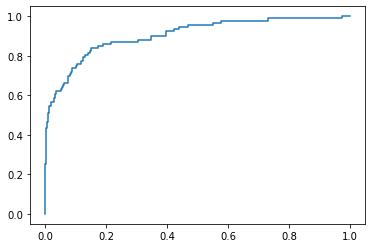

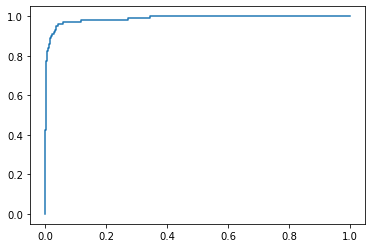

In [18]:
#Import roc curve from sklearn
from sklearn.metrics import roc_curve

#Plot the ROC Curve
j_test_5_pred_scores = cross_val_predict(sgd5, I_test_sample, j_test_5, cv=3, method = "decision_function")
fpr5, tpr5, thresholds5 = roc_curve(j_test_5, j_test_5_pred_scores)
plt.plot(fpr5, tpr5)
plt.show()

j_test_6_pred_scores = cross_val_predict(sgd6, I_test_sample, j_test_6, cv=3, method = "decision_function")
fpr6, tpr6, thresholds6 = roc_curve(j_test_6, j_test_6_pred_scores)
plt.plot(fpr6, tpr6)
plt.show()

**4. Which of the two models is better based on the comparison?**

**Second model is better than the first as the lift of the curve is higher than the base line (Non predictive value line) and the closer it is to the ideal maximum (Max = 1) the better is the performance.**

## <font color = 'Blue'>Question 3:</font>

**1. Provide one example that uses regularization to build a model, in which the "regularized model" shows better performance than the "un-regularized model" on a test set. You can use the polynomial regression example we did in class for this.**

In [19]:
#Generating data points
a = 10000
U = 6 * np.random.rand(a,1) - 3
v = 5*(U**3) + 4*(U**2) + 3*U + 2 + 2*np.random.randn(a,1)

In [20]:
#Import Polynomial Features
from sklearn.preprocessing import PolynomialFeatures

#Set polynomial features
num_deg = 2
polyFts = PolynomialFeatures(degree = num_deg, include_bias=False)
UPoly = polyFts.fit_transform(U)
print(U[0], UPoly[0])
print(U.shape, UPoly.shape)

[-1.56612883] [-1.56612883  2.45275952]
(10000, 1) (10000, 2)


In [21]:
#Creating test and train splits
from sklearn.model_selection import train_test_split
U_train, U_test, v_train, v_test = train_test_split(UPoly, v, test_size=0.3)
print(U_train.shape, v_train.shape, U_test.shape, v_test.shape)

(7000, 2) (7000, 1) (3000, 2) (3000, 1)


In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

#Non-Regularized linear regression
lin_reg = LinearRegression()
lin_reg.fit(U_train, v_train)

# predictions
train_predict = lin_reg.predict(U_train)
test_predict = lin_reg.predict(U_test)

# train_mse
train_mse = mean_squared_error(v_train,train_predict)
print("Mean Squared Error Train: ", train_mse)

# test_mse
test_mse = mean_squared_error(v_test,test_predict)
print("Mean Squared Error Test: ", test_mse)

Mean Squared Error Train:  424.2122763465862
Mean Squared Error Test:  433.0168206578369


In [23]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

#Regularizartion 

lasso_reg = Ridge(alpha=100)
lasso_reg.fit(U_train, v_train)

# predictions
train_predict = lasso_reg.predict(U_train)
test_predict = lasso_reg.predict(U_test)

# train_mse
train_mse = mean_squared_error(v_train,train_predict)
print("Mean Squared Error Train: ", train_mse)

# test_mse
test_mse = mean_squared_error(v_test,test_predict)
print("Mean Squared Error Test: ", test_mse)

Mean Squared Error Train:  424.2734456693517
Mean Squared Error Test:  433.3371104410767


**After regularization the MSE reduced by a small value.**